<a href="https://colab.research.google.com/github/MuhammadUsama100/Fit_Line_Using_Regression/blob/master/Fit_Line_Using_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf 

In [0]:
x_data = np.linspace(0.0 , 10.0, 1000000)

In [0]:
noise = np.random.randn(len(x_data))

In [6]:
noise


array([ 1.02580124,  1.60564253,  0.03405911, ..., -0.71843098,
       -0.20166232,  0.11588382])

In [0]:
# y =  mx + b
b = 5

In [0]:
y_true = (0.5 * x_data) + 5 +noise

In [0]:
x_df = pd.DataFrame(data = x_data , columns=["X Data"])
y_df = pd.DataFrame(data= y_true , columns=["Y"])


In [10]:
y_df.head()

,Y
0,6.025801
1,6.605648
2,5.034069
3,3.897066
4,7.024844


In [0]:
my_data = pd.concat([x_df , y_df] , axis= 1)

In [12]:
my_data.head()

,X Data,Y
0,0.00000,6.025801
1,0.00001,6.605648
2,0.00002,5.034069
3,0.00003,3.897066
4,0.00004,7.024844


In [13]:
my_data.sample(n=250)

,X Data,Y
231639,2.316392,6.632448
705381,7.053817,9.030043
318950,3.189503,6.208524
141645,1.416451,4.389749
201217,2.012172,5.930989
...,...,...
277225,2.772253,5.514699
641744,6.417446,7.560012
593165,5.931656,9.168672
694124,6.941247,8.527783


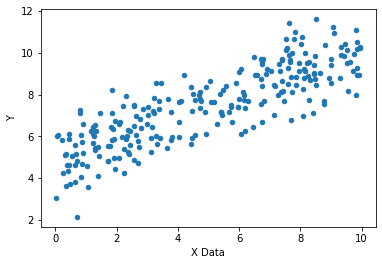

In [14]:
my_data.sample(n=250).plot(kind= "scatter" , x = "X Data" , y = "Y")

In [0]:
batch_size = 8 

In [16]:
np.random.randn(2)

array([-1.08448239,  0.03239967])

In [0]:
m = tf.Variable(0.86)

In [0]:
b = tf.Variable(0.45) 

In [0]:
xplace  = tf.placeholder(tf.float32 , [batch_size])

In [0]:
yplace =  tf.placeholder(tf.float32 , [batch_size])

In [0]:
ymodel =  m*xplace + b 

In [0]:
error =  tf.reduce_sum(tf.square(yplace - ymodel))

In [0]:
optimizr = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train  = optimizr.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess : 
  sess.run(init)
  batches = 10000 # I have run through 10000 of dataset 1000000 for 100000 is is over fitting  
  for i  in range (batches) : 
    rand_ind  = np.random.randint(len(x_data) , size=batch_size)
    feed = {xplace:x_data[rand_ind],yplace:y_true[rand_ind]}
    sess.run(train, feed_dict = feed)
  model_m , model_b = sess.run([m ,b])


In [26]:
model_m

0.44858366

In [27]:
model_b

4.9981384

In [0]:
y_hat = x_data*model_m + model_b

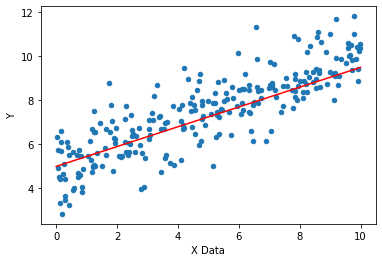

In [29]:
my_data.sample(250).plot(kind = "scatter" ,  x= "X Data" , y = "Y")
plt.plot(x_data ,  y_hat ,"r")

# TF ESTIMATOR

In [0]:
feat_cols = [tf.feature_column.numeric_column("x" , shape= [1])]

In [32]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1uyhfk93', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f7b744d26a0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train , x_eval , y_train , y_eval  =  train_test_split(x_data, y_true , test_size = 0.3 , random_state = 101 )

In [35]:
print(x_train.shape)

(700000,)


In [36]:
print(x_eval.shape)

(300000,)


In [0]:
input_func =  tf.estimator.inputs.numpy_input_fn({"x" : x_train} , y_train , batch_size=8 , num_epochs= None , shuffle=True)

In [0]:
train_input_func =  tf.estimator.inputs.numpy_input_fn({"x" : x_train} , y_train , batch_size=8 , num_epochs= 1000 , shuffle=False)

In [0]:
eval_func =  tf.estimator.inputs.numpy_input_fn({"x" : x_eval} , y_eval , batch_size=8 , num_epochs= 1000 , shuffle= False )

In [40]:
estimator.train(input_fn= input_func , steps= 1000 )

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp1uyhfk93/mo

In [42]:
train_metrics =  estimator.evaluate(input_fn= train_input_func , steps=1000 )

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-12T10:37:20Z


INFO:tensorflow:Starting evaluation at 2020-03-12T10:37:20Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2020-03-12-10:37:21


INFO:tensorflow:Finished evaluation at 2020-03-12-10:37:21


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0809436, global_step = 1000, label/mean = 7.5011263, loss = 8.647549, prediction/mean = 7.3233085


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0809436, global_step = 1000, label/mean = 7.5011263, loss = 8.647549, prediction/mean = 7.3233085


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp1uyhfk93/model.ckpt-1000


In [43]:
eval_matrix =  estimator.evaluate(input_fn= eval_func , steps=1000)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-03-12T10:39:41Z


INFO:tensorflow:Starting evaluation at 2020-03-12T10:39:41Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [100/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [200/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [300/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [400/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [500/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [600/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [700/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [800/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [900/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Evaluation [1000/1000]


INFO:tensorflow:Finished evaluation at 2020-03-12-10:39:42


INFO:tensorflow:Finished evaluation at 2020-03-12-10:39:42


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1111265, global_step = 1000, label/mean = 7.484146, loss = 8.889012, prediction/mean = 7.302178


INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1111265, global_step = 1000, label/mean = 7.484146, loss = 8.889012, prediction/mean = 7.302178


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp1uyhfk93/model.ckpt-1000


In [44]:
print("TRAINING DATA METRIX")
print(train_metrics)

TRAINING DATA METRIX
{'average_loss': 1.0809436, 'label/mean': 7.5011263, 'loss': 8.647549, 'prediction/mean': 7.3233085, 'global_step': 1000}


In [45]:
print("eval Data matrix")
print(eval_matrix)

eval Data matrix
{'average_loss': 1.1111265, 'label/mean': 7.484146, 'loss': 8.889012, 'prediction/mean': 7.302178, 'global_step': 1000}


In [0]:
brand_new_data  =  np.linspace(0,10,10)

In [0]:
input_fn_predict =  tf.estimator.inputs.numpy_input_fn({"x" : brand_new_data},  shuffle=False)

In [48]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3976674], dtype=float32)},
 {'predictions': array([5.047518], dtype=float32)},
 {'predictions': array([5.6973686], dtype=float32)},
 {'predictions': array([6.3472185], dtype=float32)},
 {'predictions': array([6.9970694], dtype=float32)},
 {'predictions': array([7.6469193], dtype=float32)},
 {'predictions': array([8.29677], dtype=float32)},
 {'predictions': array([8.946621], dtype=float32)},
 {'predictions': array([9.596472], dtype=float32)},
 {'predictions': array([10.246321], dtype=float32)}]

In [51]:
prediction  = []
for pred in estimator.predict(input_fn= input_fn_predict):
  prediction.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Restoring parameters from /tmp/tmp1uyhfk93/model.ckpt-1000


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [52]:
prediction

[array([4.3976674], dtype=float32),
 array([5.047518], dtype=float32),
 array([5.6973686], dtype=float32),
 array([6.3472185], dtype=float32),
 array([6.9970694], dtype=float32),
 array([7.6469193], dtype=float32),
 array([8.29677], dtype=float32),
 array([8.946621], dtype=float32),
 array([9.596472], dtype=float32),
 array([10.246321], dtype=float32)]

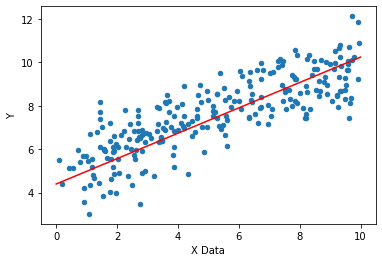

In [61]:
my_data.sample(250).plot(kind = "scatter" ,  x= "X Data" , y = "Y")
plt.plot(brand_new_data , prediction , "r")